## Implementing FeedForward Neural Network with Keras And TensorFlow

# 1. Import the necessary Packages


* Dense is the implementation of fully connected layer.
* Sequential will be used for network creation, indicating a feed forward network.
* SGD Stochstic Gradient Descent is the optimization function.
* classification_report will be used to get a formatted report, displaying the total accuracy of the model, along with a breakdown on the classification accuary for each digit.
* LabelBinarizer will be used to transform categorical labels from single integer to a vector.



In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend
import matplotlib.pyplot as plt
import numpy
import argparse



# 2. Load the training and testing data - MNIST

In [2]:
((train_x,train_y),(test_x,test_y))=mnist.load_data()

#Reshaping the data, flattening the data as the MNIST dataset images 
#are in the shape (28 x 28 x 1)
train_x=train_x.reshape((train_x.shape[0], 28*28*1))
test_x=test_x.reshape((test_x.shape[0], 28*28*1))

# Normalization , scaling the data between (0,1)
train_x = train_x.astype("float32") / 255
test_x = test_x.astype("float32") / 255

# Converting the data to vectors.
lb = LabelBinarizer()
train_y=lb.fit_transform(train_y)
test_y=lb.transform(test_y)

11490434/11490434 [==============================] - 0s 0us/step


# 3. Define the network architecture using Keras


Here there are 3 layers.
1. Input Layer : It learns 256 weights and uses "Sigmoid" as the activation function. The reason for input shape being 784, is that the resulting of flattening of the MNIST data, from (28 x 28 x 1) is 784.
2. Hidden Layer : The number of weights is 128, and uses "Sigmoid" as the activation function.
3. Output Layer : There are 10 classes in MNIST dataset. Thus, the output layer is of 10 nodes. Reason for using "Softmax" as the activation function is that sigmoid is used for 2 class classification where as, softmax is used for multiclass classifier.

In [3]:
model = Sequential()
model.add(Dense(256,input_shape=(784,),activation="sigmoid"))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

# 4. Train the mode using SGD

* Batch size of 128 means, 128 data points will be trained at a time. The method returns a dictionary which consists of the loss and accuracy of the network.
* SGD optimizer is using a learning rate of 0.01 and [Categorical Crossentropy](https://peltarion.com/knowledge-center/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy) is used as the loss metric, cross entropy  is the reason for converting the inputs from integer to vector labels.

In [4]:
sdg = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer = sdg, 
              metrics = ["accuracy"])
result = model.fit(train_x,train_y,validation_data=(test_x,test_y),
                   epochs=100,batch_size=128)


Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 2.2786 - accuracy: 0.1762 - val_loss: 2.2424 - val_accuracy: 0.2064
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2101 - accuracy: 0.3839 - val_loss: 2.1682 - val_accuracy: 0.5716
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 2.1236 - accuracy: 0.5486 - val_loss: 2.0642 - val_accuracy: 0.5647
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 1.9990 - accuracy: 0.6135 - val_loss: 1.9119 - val_accuracy: 0.6647
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 1.8224 - accuracy: 0.6439 - val_loss: 1.7076 - val_accuracy: 0.6768
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 1.6061 - accuracy: 0.6705 - val_loss: 1.4823 - val_accuracy: 0.7161
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 1.3894 - accuracy: 0.7035 - val_loss: 1.2784 - val_accuracy: 0.7277

# 5. Evaluate the network



.

In [5]:
predictions = model.predict(test_x,batch_size=128)
print(classification_report(test_y.argmax(axis=1),
      predictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))


79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.91      0.94      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.90      0.89       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# 6. Plot the training loss and accuracy

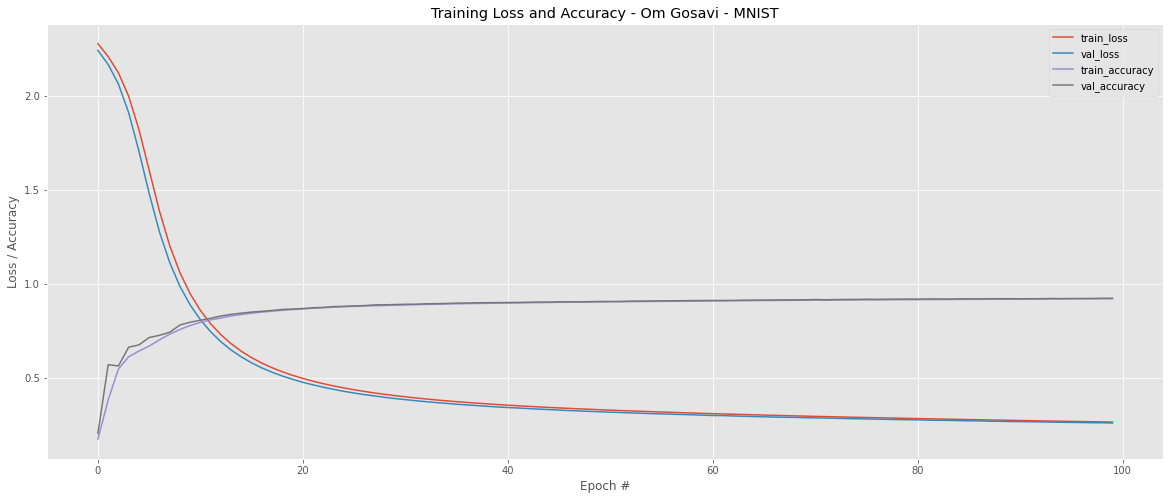

In [6]:
plt.style.use("ggplot")
figure=plt.figure()
figure.set_figwidth(20)
figure.set_figheight(8)
plt.plot(numpy.arange(0,100),result.history['loss'],label="train_loss")
plt.plot(numpy.arange(0,100),result.history['val_loss'],label="val_loss")
plt.plot(numpy.arange(0,100),result.history['accuracy'],label="train_accuracy")
plt.plot(numpy.arange(0,100),result.history['val_accuracy'],label="val_accuracy")
plt.title("Training Loss and Accuracy - Om Gosavi - MNIST")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.legend()